<a href="https://colab.research.google.com/github/Charlee0616/Data-Mining/blob/main/GaussianMixture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from scipy import stats
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [2]:
penguins = pd.read_csv("https://github.com/mbrudd/csci290/raw/refs/heads/main/data/penguins.csv")

In [3]:
iris = load_iris()

In [4]:
def inertia(data, centroids, labels): #calculates "inertia", the sum of squared distances between each data point and its assigned cluster
  inertia = 0
  for i, point in enumerate(data):
    centroid_idx = int(labels[i])
    inertia += np.sum((point - centroids[centroid_idx])**2)
  return inertia

In [5]:
def kmeansplus(df, k):
  centroids = [df.iloc[np.random.choice(range(df.shape[0]))].values]
  for i in range(1, k):
    distances = np.array([min([np.linalg.norm(point - c)**2 for c in centroids]) for point in df.values])
    probabilities = distances / np.sum(distances)
    next_centroid = df.iloc[np.random.choice(range(df.shape[0]), p=probabilities)].values
    centroids.append(next_centroid)
  return np.array(centroids)

In [27]:
def Kmeans(df, k, method = "random", max_iters=10):
  if isinstance(df, np.ndarray):
    df = pd.DataFrame(df)
#the three different methods for initializing the clusters
  if method == "random": #randomly selects data points as initial centroids
    centroids = df.iloc[np.random.choice(df.shape[0], k, replace=False)]
  elif method == "picked": #selectes the first k data points as the initial centroids
    centroids = df.iloc[:k]
  elif method == "kmeans++": #selects the initial centroids using a strategy that spreads out the inital centroids
    centroids = kmeansplus(df, k)

  data = df.values
  labels = np.zeros(data.shape[0]) #converts data into NumPy array for computation
  for i in range(max_iters):
    for idx, point in enumerate(data):
      distances = np.sqrt(np.sum((point - centroids)**2, axis=1)) #calculates euclidean distance
      labels[idx] = np.argmin(distances) #data points assigned to centroids based on their distance
    new_centroids = np.array([data[labels == j].mean(axis=0) for j in range(k)]) #new centroids are created based on the mean of the points in each cluster
    if np.all(centroids == new_centroids): #process repeats until the centroids stop moving or max iterations are reached
        break
    centroids = new_centroids
#plotting the kmeans cluster method results for each iteration
   # plt.figure(figsize=(8,6))
    #for j in range(k):
     # plt.scatter(data[labels == j, 0], data[labels == j, 1], label=f"Cluster {j+1}")
   # plt.scatter(centroids[:, 0], centroids[:, 1], color = 'black', marker='X', s=200, label = "Centroids")
   # plt.title(f"K-Means Clustering (Iteration {i+1})")
   # plt.xlabel(df.columns[0])
   # plt.ylabel(df.columns[1])
   # plt.legend()
   # plt.show()
  calc_inertia = inertia(data, centroids, labels)
  return centroids, labels, calc_inertia


In [7]:
def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

In [59]:
def plot_gaussian_mixture(clusterer, X, colx, coly, kmeans_centroids=None, resolution=1000, show_ylabels=True):
    if kmeans_centroids is not None:
        plt.scatter(kmeans_centroids[:, 0], kmeans_centroids[:, 1], marker='x', s=200, color='purple', label='KMeans Centroids')

    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')

    plt.plot(X[colx], X[coly], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel(colx)
    if show_ylabels:
        plt.ylabel(coly, rotation=0)
    else:
        plt.tick_params(labelleft=False)



# **GaussianMixture on the Iris Dataset**

In [10]:
df = pd.DataFrame( iris.data, columns = iris.feature_names)
true_labels = iris.target

In [11]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [12]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(df)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [13]:
gm.weights_

array([0.30118609, 0.33333333, 0.36548058])

In [14]:
gm.means_

array([[5.91697517, 2.77803998, 4.20523542, 1.29841561],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.54632887, 2.94943079, 5.4834877 , 1.98716063]])

In [15]:
gm.covariances_

array([[[0.27550587, 0.09663458, 0.18542939, 0.05476915],
        [0.09663458, 0.09255531, 0.09103836, 0.04299877],
        [0.18542939, 0.09103836, 0.20227635, 0.0616792 ],
        [0.05476915, 0.04299877, 0.0616792 , 0.03232217]],

       [[0.121765  , 0.097232  , 0.016028  , 0.010124  ],
        [0.097232  , 0.140817  , 0.011464  , 0.009112  ],
        [0.016028  , 0.011464  , 0.029557  , 0.005948  ],
        [0.010124  , 0.009112  , 0.005948  , 0.010885  ]],

       [[0.38741443, 0.09223101, 0.30244612, 0.06089936],
        [0.09223101, 0.11040631, 0.08386768, 0.0557538 ],
        [0.30244612, 0.08386768, 0.32595958, 0.07283247],
        [0.06089936, 0.0557538 , 0.07283247, 0.08488025]]])

In [16]:
gm.converged_

True

In [17]:
gm.n_iter_

17

In [18]:
gm.predict(df)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [19]:
gm.score_samples(df).round(2)

array([ 1.57,  0.74,  1.14,  0.93,  1.41, -0.09,  0.05,  1.62,  0.27,
        0.17,  0.83,  0.77,  0.3 , -1.79, -3.42, -2.11, -1.13,  1.48,
       -0.85,  0.98, -0.93,  0.41, -3.84, -1.89, -3.17, -0.12,  0.51,
        1.38,  1.12,  0.69,  0.78, -0.69, -2.13, -0.88,  1.15,  0.12,
       -1.12,  0.23,  0.13,  1.5 ,  0.94, -4.49, -0.34, -4.48, -2.59,
        0.68,  0.39,  1.04,  1.16,  1.55, -2.04, -0.27, -0.85, -2.33,
       -1.16, -0.79, -0.82, -1.4 , -0.45, -1.64, -2.59, -0.6 , -2.52,
       -0.11, -1.93, -1.16, -1.27, -2.94, -5.17,  0.26, -2.49, -0.02,
       -2.19, -2.58,  0.09, -0.48, -1.33, -2.27, -0.06, -1.86,  0.13,
       -0.49,  0.54, -1.43, -2.52, -2.22, -0.32, -3.75, -0.44, -0.35,
       -1.84,  0.24,  0.7 , -1.18,  0.44, -1.74,  0.35,  0.59, -4.2 ,
        0.75, -4.19, -1.3 , -0.77, -1.39, -1.12, -2.55, -4.41, -2.35,
       -2.07, -2.53, -1.52, -0.62, -0.7 , -2.27, -3.41, -1.35, -0.8 ,
       -5.03, -7.06, -2.99, -1.04, -1.69, -3.85, -1.35, -0.95, -1.97,
       -1.41, -1.23,

In [28]:
simpledf = df[['sepal width (cm)', 'sepal length (cm)']]

In [64]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(simpledf)

GaussianMixture(n_components=3, n_init=10, random_state=42)

<ipython-input-59-4c7820e31400>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-59-4c7820e31400>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

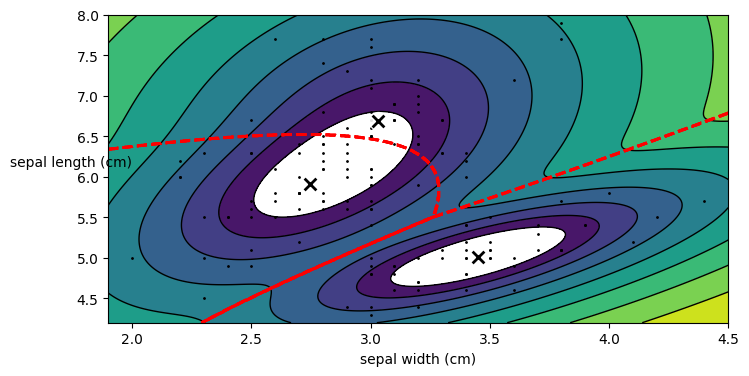

In [65]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, simpledf, 'sepal width (cm)', 'sepal length (cm)')
plt.show()

<ipython-input-59-4c7820e31400>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-59-4c7820e31400>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

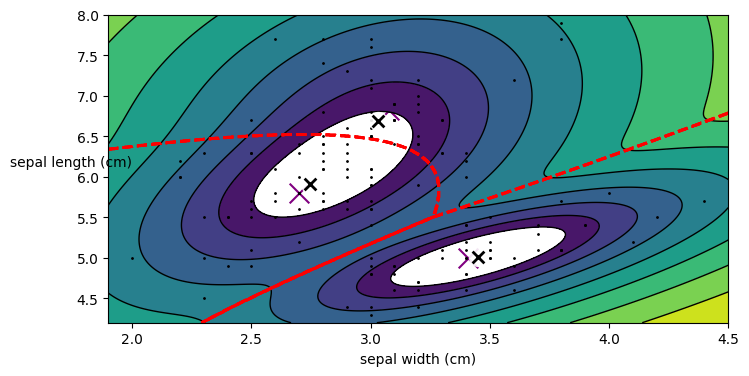

In [66]:
centroids_random, _,_ = Kmeans(simpledf, 3, method="kmeans++")
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, simpledf, 'sepal width (cm)', 'sepal length (cm)', kmeans_centroids=centroids_random)
plt.show()

# **GaussianMixture on the Penguins Dataset**

In [31]:
penguins = penguins.drop(columns=["species", "island", "sex"])
penguins = penguins.dropna()
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(penguins)

GaussianMixture(n_components=3, n_init=10, random_state=42)

In [32]:
gm.weights_

array([0.44521878, 0.35964912, 0.1951321 ])

In [33]:
gm.means_

array([[  38.80510777,   18.32285123,  189.70156282, 3690.26987841,
        2008.01500334],
       [  47.50487811,   14.98211378,  217.18699184, 5076.01625695,
        2008.07317073],
       [  48.99285924,   18.47562789,  196.5099332 , 3757.41438124,
        2007.98075256]])

In [34]:
gm.covariances_

array([[[ 6.93945078e+00,  1.17103657e+00,  4.42982766e+00,
          6.13917675e+02,  2.85962764e-02],
        [ 1.17103657e+00,  1.49117812e+00,  2.54404659e+00,
          3.24241364e+02, -2.17127411e-01],
        [ 4.42982766e+00,  2.54404659e+00,  3.98218781e+01,
          1.34136899e+03,  1.72867997e+00],
        [ 6.13917675e+02,  3.24241364e+02,  1.34136899e+03,
          2.07582371e+05, -1.50751076e+01],
        [ 2.85962764e-02, -2.17127411e-01,  1.72867997e+00,
         -1.50751076e+01,  6.69632475e-01]],

       [[ 9.42062760e+00,  1.92976222e+00,  1.31064053e+01,
          1.03117393e+03,  4.83382913e-01],
        [ 1.92976222e+00,  9.54965552e-01,  4.45944214e+00,
          3.52802729e+02,  1.84235581e-01],
        [ 1.31064053e+01,  4.45944214e+00,  4.17130033e+01,
          2.27846854e+03,  1.00257786e+00],
        [ 1.03117393e+03,  3.52802729e+02,  2.27846854e+03,
          2.52067061e+05,  2.41126322e+01],
        [ 4.83382913e-01,  1.84235581e-01,  1.00257786e+00,
  

In [35]:
gm.converged_

True

In [36]:
gm.n_iter_

53

In [37]:
gm.predict(penguins)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2,

In [38]:
gm.score_samples(penguins).round(2)

array([-15.28, -15.6 , -18.12, -16.34, -16.77, -15.25, -17.47, -17.33,
       -15.71, -15.5 , -16.09, -16.67, -17.75, -21.37, -15.24, -16.55,
       -16.78, -16.  , -20.2 , -17.19, -15.45, -15.63, -15.32, -16.57,
       -15.9 , -15.28, -16.35, -18.59, -16.18, -16.83, -17.07, -15.61,
       -15.18, -18.21, -17.15, -15.22, -16.79, -16.22, -18.71, -15.36,
       -16.01, -15.95, -17.06, -16.18, -17.45, -16.22, -17.29, -15.57,
       -17.16, -14.15, -15.26, -14.87, -15.67, -16.28, -14.38, -14.1 ,
       -14.08, -15.66, -14.41, -14.79, -16.47, -14.69, -14.47, -15.42,
       -14.67, -17.45, -14.64, -15.64, -15.39, -16.8 , -13.87, -15.73,
       -16.48, -15.08, -15.44, -15.69, -15.92, -16.22, -14.68, -15.24,
       -19.33, -14.68, -17.15, -14.27, -17.06, -15.26, -14.19, -14.35,
       -13.94, -18.03, -18.46, -15.7 , -17.32, -14.36, -18.95, -13.81,
       -15.31, -17.28, -15.29, -16.02, -17.54, -16.34, -17.87, -17.76,
       -16.65, -15.95, -16.92, -16.29, -17.88, -17.04, -19.73, -15.74,
      

In [39]:
penguinsdf = penguins[['bill_length_mm', 'bill_depth_mm']]

In [40]:
gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(penguinsdf)

GaussianMixture(n_components=3, n_init=10, random_state=42)

<ipython-input-24-f054ffcad3d4>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-24-f054ffcad3d4>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

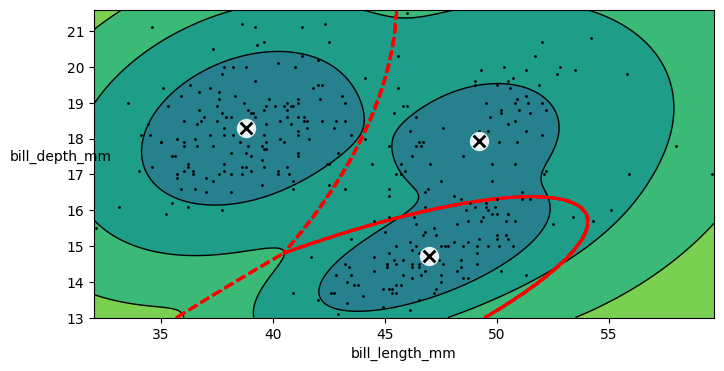

In [41]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, penguinsdf, 'bill_length_mm', 'bill_depth_mm')
plt.show()

<ipython-input-46-4c7820e31400>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
<ipython-input-46-4c7820e31400>:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  np.linspace(mins[1], maxs[1], resolution))
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianMixture was fitted with feature names
  warnings.warn(

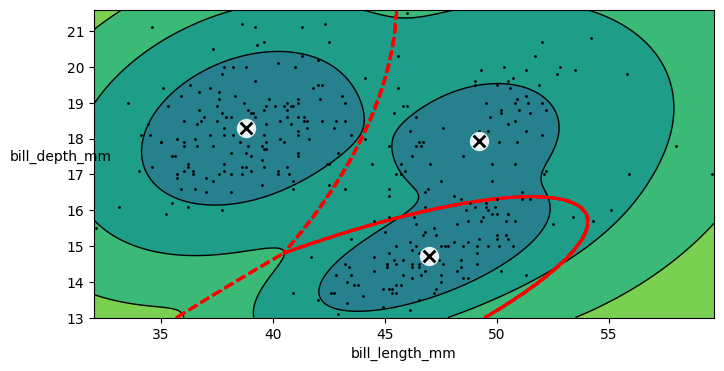

In [54]:
centroids_random, _,_ = Kmeans(penguinsdf, 3, method="random")
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, penguinsdf, 'bill_length_mm', 'bill_depth_mm', kmeans_centroids=centroids_random)
plt.show()

# **Comparing it to My KMeans Clutering**